In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.duplicated().sum()

3854

In [5]:
df.drop_duplicates(keep='first',inplace=True)

In [6]:
df.duplicated().sum()

0

# EDA

In [7]:
df.shape

(96146, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


### Target column distribution

In [19]:
df['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

([<matplotlib.patches.Wedge at 0x20811faa3d0>,
 [Text(-1.0580226698378064, 0.3009784545599244, '0'),
  Text(1.0580226698378064, -0.30097845455992456, '1')],
 [Text(-0.5771032744569852, 0.1641700661235951, '91.18%'),
  Text(0.5771032744569852, -0.1641700661235952, '8.82%')])

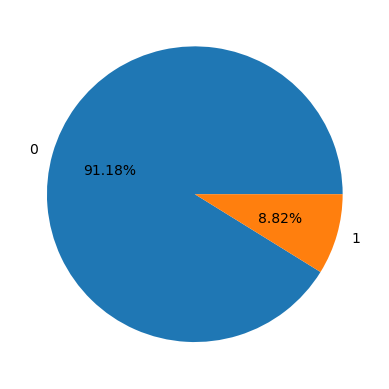

In [20]:
plt.pie(df['diabetes'].value_counts().values,labels=df['diabetes'].value_counts().index,autopct='%1.2f%%')

### Numerical columns

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df[df['age']<1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,Female,0.08,0,0,No Info,14.43,6.5,160,0
218,Female,0.56,0,0,No Info,16.85,5.0,140,0
241,Male,0.88,0,0,No Info,17.49,6.0,140,0
268,Female,0.16,0,0,No Info,12.15,6.6,100,0
396,Male,0.16,0,0,No Info,14.35,6.5,126,0
...,...,...,...,...,...,...,...,...,...
99452,Male,0.32,0,0,No Info,15.93,5.7,100,0
99536,Female,0.40,0,0,No Info,16.66,3.5,140,0
99629,Female,0.64,0,0,No Info,17.58,6.1,140,0
99778,Female,0.32,0,0,No Info,12.26,5.8,126,0


In [11]:
df.loc[(df['age']<3) & (df['diabetes']==1)] #ages less than 3 do not have diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


<AxesSubplot:xlabel='age', ylabel='Density'>

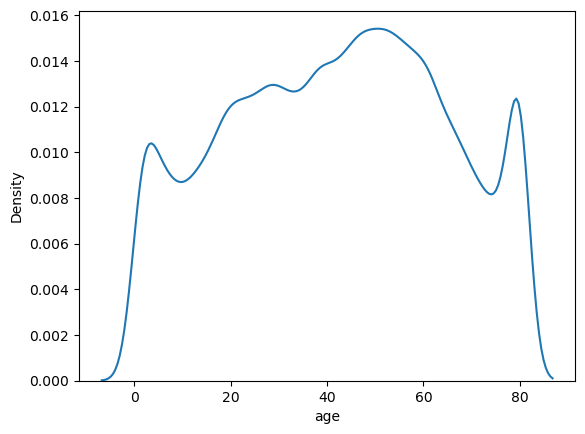

In [14]:
sns.kdeplot(data=df['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

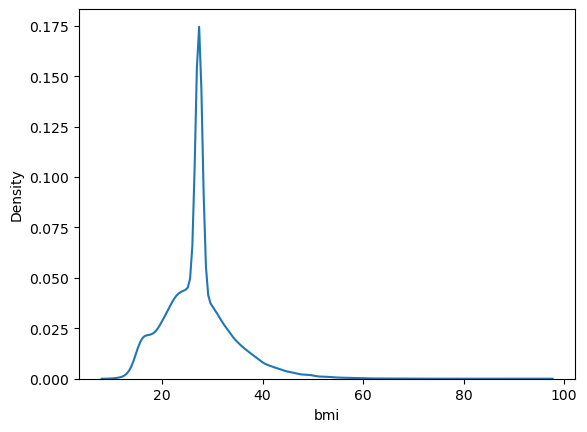

In [15]:
sns.kdeplot(data=df['bmi'])

<AxesSubplot:xlabel='HbA1c_level', ylabel='Density'>

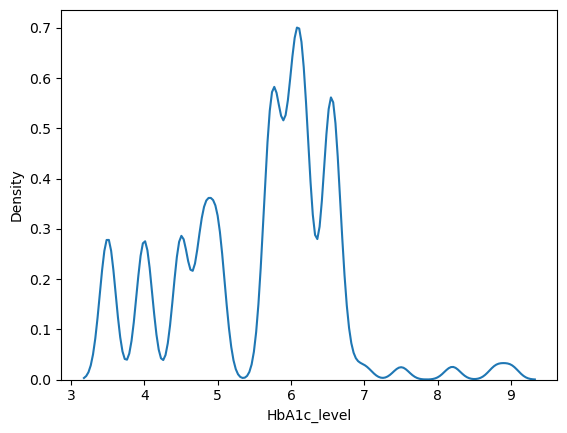

In [16]:
sns.kdeplot(data=df['HbA1c_level'])

<AxesSubplot:xlabel='blood_glucose_level', ylabel='Density'>

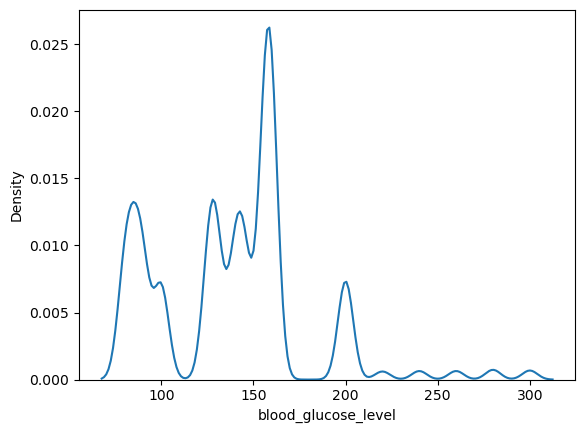

In [17]:
sns.kdeplot(data=df['blood_glucose_level'])

### Numercial columns and diabetes column

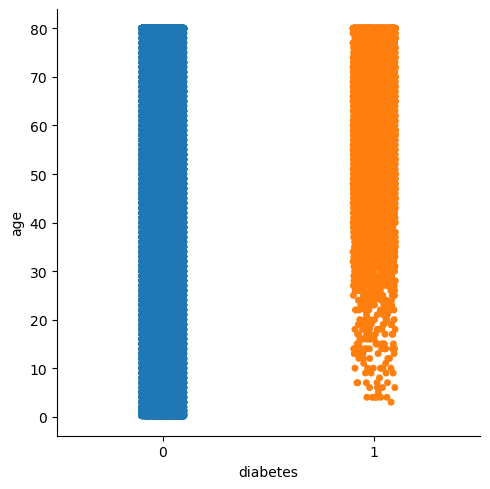

In [21]:
sns.catplot(x='diabetes',y='age', data=df) #out of the people who have diabetes: people below the age of 25 are lesser

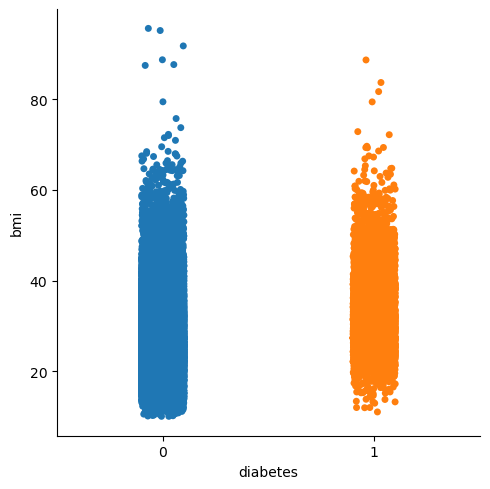

In [22]:
sns.catplot(x='diabetes',y='bmi', data=df) #no apparent relation

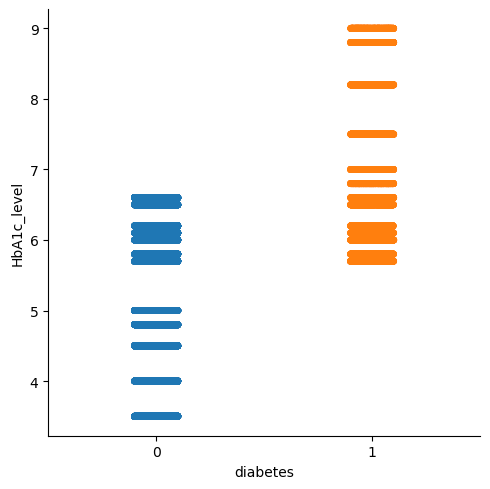

In [23]:
sns.catplot(x='diabetes',y='HbA1c_level', data=df) #people who have HbA1c_levels > 5.5 have diabetes; some people who have HbA1c_levels > 5.5 do not have diabetes 

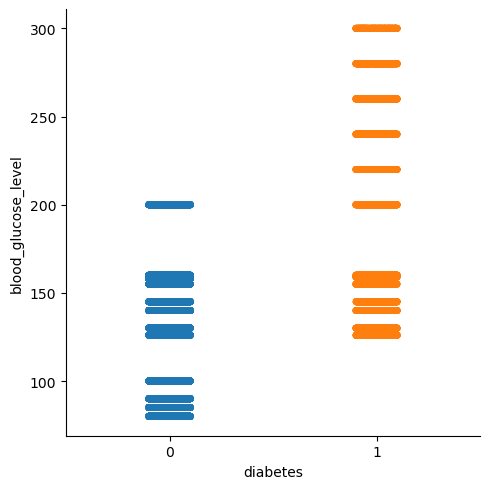

In [24]:
sns.catplot(x='diabetes',y='blood_glucose_level', data=df) #all the people with diabetes have a bloog sugar level greater than 125

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 9.4+ MB


### Categorical columns

In [42]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [26]:
df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [28]:
df['hypertension'].value_counts()

0    88685
1     7461
Name: hypertension, dtype: int64

In [29]:
df['heart_disease'].value_counts()

0    92223
1     3923
Name: heart_disease, dtype: int64

In [30]:
df['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [31]:
df1=df.copy()
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [32]:
df1['smoking_history']=np.where(df1['smoking_history']=='not current','former',df1['smoking_history'])
df1['smoking_history']=np.where(df1['smoking_history']=='ever','never',df1['smoking_history'])

In [33]:
df1['smoking_history'].value_counts()

never      38396
No Info    32887
former     15666
current     9197
Name: smoking_history, dtype: int64

### Categorical columns and diabetes column 

In [38]:
crosstab=pd.crosstab(index=df1['diabetes'], columns=df1['gender'])
crosstab

gender,Female,Male,Other
diabetes,,,
0,51714,35932,18
1,4447,4035,0


In [39]:
crosstab=pd.crosstab(index=df1['diabetes'], columns=df1['hypertension'])
crosstab

hypertension,0,1
diabetes,,
0,82289,5375
1,6396,2086


In [40]:
crosstab=pd.crosstab(index=df1['diabetes'], columns=df1['heart_disease'])
crosstab

heart_disease,0,1
diabetes,,
0,85008,2656
1,7215,1267


In [41]:
crosstab=pd.crosstab(index=df1['diabetes'], columns=df1['smoking_history'])
crosstab

smoking_history,No Info,current,former,never
diabetes,,,,
0,31442,8249,13386,34587
1,1445,948,2280,3809


In [42]:
df1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Model building

In [49]:
#X and y split
X=df1.drop(['diabetes'],axis=1)
y=df1['diabetes']

In [50]:
print(X.shape)
print(y.shape)

(96146, 8)
(96146,)


In [52]:
#dummification
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 9.4+ MB


In [53]:
catdf = df1.select_dtypes(include='object')
catdf.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [54]:
X=pd.get_dummies(X,columns=catdf.columns,drop_first=True)

In [55]:
print(X.shape)

(96146, 11)


In [56]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never
0,80.0,0,1,25.19,6.6,140,0,0,0,0,1
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,1
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0


In [57]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=123)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76916, 11)
(76916,)
(19230, 11)
(19230,)


In [60]:
#standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Random forest

In [61]:
#Using ensemble methods as the dataset is imbalanced
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std,y_train)

RandomForestClassifier()

In [62]:
y_pred_train = rf.predict(X_train_std)
y_pred_test = rf.predict(X_test_std)

In [72]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [73]:
# calculate confusion matrix-train
cm = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix:")
print(cm)
# calculate accuracy-train
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
# calculate recall-train
recall = recall_score(y_train, y_pred_train)
print("Recall:", recall)
# calculate precision-train
precision = precision_score(y_train, y_pred_train)
print("Precision:", precision)
# calculate f1-train
f1 = f1_score(y_train, y_pred_train)
print("f1:", f1)



Confusion matrix:
[[70121     9]
 [   53  6733]]
Accuracy: 0.9991939258411774
Recall: 0.9921898025346301
Precision: 0.9986650845446455
f1: 0.9954169130691899


In [74]:
# calculate confusion matrix-test
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:")
print(cm)
# calculate accuracy-test
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
# calculate recall-test
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)
# calculate precision-test
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
# calculate f1-test
f1 = f1_score(y_test, y_pred_test)
print("f1:", f1)

Confusion matrix:
[[17453    81]
 [  543  1153]]
Accuracy: 0.9675507020280811
Recall: 0.6798349056603774
Precision: 0.9343598055105349
f1: 0.7870307167235496


# Random forest with grid search

In [77]:
from sklearn.model_selection import cross_validate, GridSearchCV

In [75]:
param_grid = {"n_estimators" : [50,60,150],
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5],
              "max_depth": [None, 15],
              "min_samples_leaf": [1, 5],
              "ccp_alpha":[0.0001,0.001,0.01,0.1]
             }

In [76]:
rf2 = RandomForestClassifier()

In [78]:
rf2_grid = GridSearchCV(rf2, param_grid=param_grid, cv=5, scoring="f1")

In [79]:
rf2_grid.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0001, 0.001, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 15], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 60, 150]},
             scoring='f1')

In [80]:
rf2_grid.best_params_

{'ccp_alpha': 0.0001,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 60}

In [81]:
y_pred_train = rf2_grid.predict(X_train_std)
y_pred_test = rf2_grid.predict(X_test_std)

In [82]:
# calculate confusion matrix-train
cm = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix:")
print(cm)
# calculate accuracy-train
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
# calculate recall-train
recall = recall_score(y_train, y_pred_train)
print("Recall:", recall)
# calculate precision-train
precision = precision_score(y_train, y_pred_train)
print("Precision:", precision)
# calculate f1-train
f1 = f1_score(y_train, y_pred_train)
print("f1:", f1)

Confusion matrix:
[[70130     0]
 [ 2223  4563]]
Accuracy: 0.9710983410473764
Recall: 0.6724137931034483
Precision: 1.0
f1: 0.8041237113402061


In [83]:
# calculate confusion matrix-test
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:")
print(cm)
# calculate accuracy-test
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
# calculate recall-test
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)
# calculate precision-test
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
# calculate f1-test
f1 = f1_score(y_test, y_pred_test)
print("f1:", f1)

Confusion matrix:
[[17532     2]
 [  570  1126]]
Accuracy: 0.9702548101924077
Recall: 0.6639150943396226
Precision: 0.99822695035461
f1: 0.7974504249291785


In [84]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()

In [85]:
xgb_clf.fit(X_train_std, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [86]:
y_pred_train = xgb_clf.predict(X_train_std)
y_pred_test = xgb_clf.predict(X_test_std)

In [87]:
# calculate confusion matrix-train
cm = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix:")
print(cm)
# calculate accuracy-train
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
# calculate recall-train
recall = recall_score(y_train, y_pred_train)
print("Recall:", recall)
# calculate precision-train
precision = precision_score(y_train, y_pred_train)
print("Precision:", precision)
# calculate f1-train
f1 = f1_score(y_train, y_pred_train)
print("f1:", f1)

Confusion matrix:
[[70087    43]
 [ 1895  4891]]
Accuracy: 0.9748036819387383
Recall: 0.7207486000589449
Precision: 0.9912849614916903
f1: 0.834641638225256


In [88]:
# calculate confusion matrix-test
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:")
print(cm)
# calculate accuracy-test
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
# calculate recall-test
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)
# calculate precision-test
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
# calculate f1-test
f1 = f1_score(y_test, y_pred_test)
print("f1:", f1)

Confusion matrix:
[[17472    62]
 [  537  1159]]
Accuracy: 0.9688507540301612
Recall: 0.683372641509434
Precision: 0.9492219492219492
f1: 0.7946520397668838


# Performing oversampling to deal with imbalanced dataset

In [93]:
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

     ------------------------------------ 226.0/226.0 kB 336.6 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 307.1 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [94]:
# perform Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_res, y_train_res = oversampler.fit_resample(X_train_std, y_train)

In [103]:
print(X_train_res.shape)
print(y_train_res.shape)

(140260, 11)
(140260,)


In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [96]:
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [97]:
y_pred_train = dt.predict(X_train_std)
y_pred_test = dt.predict(X_test_std)

In [100]:
# calculate confusion matrix-train
cm = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix:")
print(cm)
# calculate accuracy-train
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
# calculate recall-train
recall = recall_score(y_train, y_pred_train)
print("Recall:", recall)
# calculate precision-train
precision = precision_score(y_train, y_pred_train)
print("Precision:", precision)
# calculate f1-train
f1 = f1_score(y_train, y_pred_train)
print("f1:", f1)

Confusion matrix:
[[70067    63]
 [    0  6786]]
Accuracy: 0.9991809246450674
Recall: 1.0
Precision: 0.9908015768725361
f1: 0.9953795379537953


In [101]:
# calculate confusion matrix-test
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:")
print(cm)
# calculate accuracy-test
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
# calculate recall-test
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)
# calculate precision-test
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
# calculate f1-test
f1 = f1_score(y_test, y_pred_test)
print("f1:", f1)

Confusion matrix:
[[17107   427]
 [  472  1224]]
Accuracy: 0.9532501300052002
Recall: 0.7216981132075472
Precision: 0.7413688673531194
f1: 0.7314012548550942


# Decision tree with grid search

In [102]:
# set of parameters to test
param_grid = {"class_weight":['balanced', None],
              "criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 6],
              "min_samples_leaf": [2, 5, 10],
               "max_leaf_nodes": [None, 5, 10, 20]
              }

In [104]:
dt2 = DecisionTreeClassifier(random_state=123)
dt_grid = GridSearchCV(dt2, param_grid,cv=5,scoring='f1')
dt_grid.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [2, 5, 10]},
             scoring='f1')

In [105]:
dt_grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2}

In [109]:
y_pred_train = dt_grid.predict(X_train_std)
y_pred_test = dt_grid.predict(X_test_std)

In [110]:
# calculate confusion matrix-train
cm = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix:")
print(cm)
# calculate accuracy-train
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
# calculate recall-train
recall = recall_score(y_train, y_pred_train)
print("Recall:", recall)
# calculate precision-train
precision = precision_score(y_train, y_pred_train)
print("Precision:", precision)
# calculate f1-train
f1 = f1_score(y_train, y_pred_train)
print("f1:", f1)

Confusion matrix:
[[59765 10365]
 [  471  6315]]
Accuracy: 0.8591190389515836
Recall: 0.9305923961096375
Precision: 0.37859712230215825
f1: 0.5382255177703912


In [111]:
# calculate confusion matrix-test
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:")
print(cm)
# calculate accuracy-test
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
# calculate recall-test
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)
# calculate precision-test
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
# calculate f1-test
f1 = f1_score(y_test, y_pred_test)
print("f1:", f1)

Confusion matrix:
[[14963  2571]
 [  117  1579]]
Accuracy: 0.8602184087363495
Recall: 0.9310141509433962
Precision: 0.3804819277108434
f1: 0.5401984262743758


# Knn 

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [114]:
y_pred_train = knn.predict(X_train_std)
y_pred_test = knn.predict(X_test_std)

C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [115]:
# calculate confusion matrix-train
cm = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix:")
print(cm)
# calculate accuracy-train
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
# calculate recall-train
recall = recall_score(y_train, y_pred_train)
print("Recall:", recall)
# calculate precision-train
precision = precision_score(y_train, y_pred_train)
print("Precision:", precision)
# calculate f1-train
f1 = f1_score(y_train, y_pred_train)
print("f1:", f1)

Confusion matrix:
[[66634  3496]
 [    0  6786]]
Accuracy: 0.9545478183992927
Recall: 1.0
Precision: 0.6599883291188485
f1: 0.7951722521677995


In [116]:
# calculate confusion matrix-test
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:")
print(cm)
# calculate accuracy-test
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
# calculate recall-test
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)
# calculate precision-test
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
# calculate f1-test
f1 = f1_score(y_test, y_pred_test)
print("f1:", f1)

Confusion matrix:
[[16328  1206]
 [  345  1351]]
Accuracy: 0.9193447737909516
Recall: 0.7965801886792453
Precision: 0.5283535393038717
f1: 0.6353162473548084
